In [1]:
%%capture
%cd ..

In [2]:
# Import data

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from utils.constants import white_list

In [3]:
# Specify dataset directory

data_dir: str = 'dataset/CS2_38'
cleaned: str = 'dataset/cleaned'
df = pd.DataFrame()
c_index = 'Cycle_Index'
cc = 'Charge_Capacity(Ah)'
dcc = 'Discharge_Capacity(Ah)'

result_list = []


In [5]:
CS2_38_cleaned = pd.DataFrame()

for filename in os.listdir(data_dir):
    xls_file = pd.ExcelFile(os.path.join(data_dir, filename))
    sheet_fnames = [sheet for sheet in xls_file.sheet_names if sheet.startswith('Channel')]

    # print(filename)
    for sheet_fname in sheet_fnames:
        df_temp = pd.read_excel(os.path.join(data_dir, filename), sheet_name=sheet_fname)
        df_temp = df_temp[white_list]
        # Trovare il massimo valore di Cycle_Index in CS2_38_cleaned
        max_combined_cycle_index = CS2_38_cleaned['Cycle_Index'].max() if not CS2_38_cleaned.empty else 0
        print(max_combined_cycle_index)
        # Aggiornare i valori di Cycle_Index nel DataFrame corrente
        df_temp['Cycle_Index'] += max_combined_cycle_index
        print(df_temp['Cycle_Index'])
        # Aggiungere il DataFrame corrente a CS2_38_cleaned
        CS2_38_cleaned = pd.concat([CS2_38_cleaned, df_temp], ignore_index=True)

0
0         1
1         1
2         1
3         1
4         1
         ..
11889    50
11890    50
11891    50
11892    50
11893    50
Name: Cycle_Index, Length: 11894, dtype: int64
50
0         51
1         51
2         51
3         51
4         51
        ... 
11085    100
11086    100
11087    100
11088    100
11089    100
Name: Cycle_Index, Length: 11090, dtype: int64
100
0       101
1       101
2       101
3       101
4       101
       ... 
9080    150
9081    150
9082    150
9083    150
9084    150
Name: Cycle_Index, Length: 9085, dtype: int64
150
0       151
1       151
2       151
3       151
4       151
       ... 
6244    192
6245    192
6246    192
6247    192
6248    192
Name: Cycle_Index, Length: 6249, dtype: int64
192
0       193
1       193
2       193
3       193
4       193
       ... 
5547    242
5548    242
5549    242
5550    242
5551    242
Name: Cycle_Index, Length: 5552, dtype: int64
242
0       243
1       243
2       243
3       243
4       243
       ... 
5547

In [6]:
CS2_38_cleaned.to_csv(os.path.join(cleaned, 'CS2_38_cleaned.csv'), index=False)

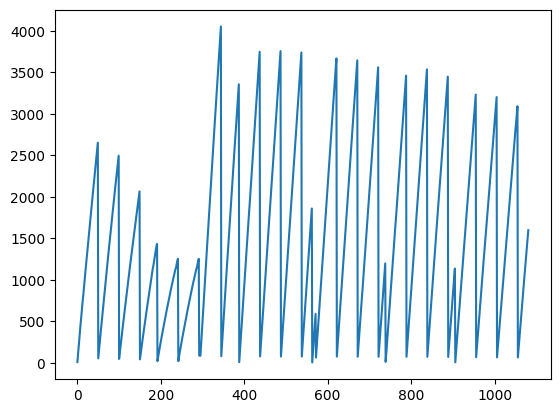

In [7]:
path: str = 'dataset/cleaned/CS2_38_cleaned.csv'
# Carica il DataFrame dal tuo file CSV
df = pd.read_csv(path)
curr_index = 1
actual_cap = 0.0
nominal_cap = 0.0

df_soh = pd.DataFrame()
values = [value['Charge_Capacity(Ah)'].max() for key, value in df.groupby('Cycle_Index')]
perc = [i / 1.35 * 100 for i in values]

plt.plot(perc)

In [ ]:
for key, value in df.groupby('Cycle_Index'):
    print(key, value)

In [ ]:
path: str = '../dataset/cleaned/CS2_38_cleaned.csv'
# Carica il DataFrame dal tuo file CSV
df = pd.read_csv(path)
curr_index = 1
actual_cap = 0.0
nominal_cap = 0.0

df_soh = pd.DataFrame()

for index, group in df.groupby('Cycle_Index'):
    actual_cap += group['Discharge_Capacity(Ah)'].iloc[index]
    nominal_cap = max(nominal_cap, group['Charge_Capacity(Ah)'].max())

    # Aggiungi l'ultima riga al DataFrame df_soh
    if nominal_cap == 0:
        soh = 0  # Assegna un valore predefinito in caso di divisione per zero
    else:
        soh = (actual_cap / nominal_cap) * 100
    row = pd.DataFrame([{'Cycle_Index': curr_index, 'actual_cap': actual_cap, 'nominal_cap': nominal_cap, 'soh': soh}])
    df_soh = pd.concat([df_soh, row])

    df_soh.reset_index(drop=True, inplace=True)


In [ ]:
df_soh.to_csv(os.path.join(cleaned, 'df_soh.csv'), index=False)

In [ ]:
path: str = '../dataset/cleaned/CS2_38_cleaned.csv'
# Carica il DataFrame dal tuo file CSV
df = pd.read_csv(path)
curr_index = 1
actual_cap = 0.0
nominal_cap = 0.0
df_soh = pd.DataFrame()
soh = 0.0

df = df.groupby(df_temp[c_index])
for key, value in df:
    if value['Cycle_Index'] == curr_index:
        actual_cap += value['Discharge_Capacity(Ah)']
        if value['Charge_Capacity(Ah)'] > nominal_cap:
            nominal_cap = value['Charge_Capacity(Ah)']
    else:
        soh = (actual_cap / nominal_cap) * 100
        row = pd.DataFrame([{'actual_cap': actual_cap, 'nominal_cap': nominal_cap, 'soh':soh}])
        df_soh = pd.concat([df_soh, row])
        curr_index += 1
        actual_cap = 0.0
        nominal_cap = 0.0
        soh = 0.0



In [ ]:
plt.plot(df['Cycle_Index'], df['Nominal_Capacity'], label='Nominal Capacity')
plt.plot(df['Cycle_Index'], df['Actual_Capacity'], label='Actual Capacity')
plt.xlabel('Cycle Index')
plt.ylabel('Capacity (SOH Sum)')
plt.legend()
plt.show()